In [1]:
import numpy as np
import pandas as pd
import json


In [2]:
df = pd.read_csv('image_2.csv')
# list(df['region_shape_attributes'])
df

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,img_001.jpg,35504,{},1,0,"{""name"":""rect"",""x"":123,""y"":96,""width"":86,""heig...","{""Face"":""Top""}"
1,img_002.jpg,48956,{},1,0,"{""name"":""rect"",""x"":124,""y"":9,""width"":122,""heig...","{""Face"":""DownLeft""}"
2,img_003.jpg,35726,{},1,0,"{""name"":""rect"",""x"":143,""y"":11,""width"":94,""heig...","{""Face"":""Front""}"
3,img_004.jpg,37611,{},1,0,"{""name"":""rect"",""x"":154,""y"":23,""width"":130,""hei...","{""Face"":""Front""}"
4,img_005.jpg,68442,{},2,0,"{""name"":""rect"",""x"":95,""y"":70,""width"":86,""heigh...","{""Face"":""Front""}"
...,...,...,...,...,...,...,...
115,img_097.jpg,41406,{},2,0,"{""name"":""rect"",""x"":82,""y"":30,""width"":123,""heig...","{""Face"":""UpLeft""}"
116,img_097.jpg,41406,{},2,1,"{""name"":""rect"",""x"":210,""y"":9,""width"":144,""heig...","{""Face"":""Up""}"
117,img_098.jpg,37953,{},1,0,"{""name"":""rect"",""x"":142,""y"":15,""width"":129,""hei...","{""Face"":""Front""}"
118,img_099.jpg,69601,{},1,0,"{""name"":""rect"",""x"":77,""y"":19,""width"":252,""heig...","{""Face"":""Front""}"


In [3]:
data = list(df['region_shape_attributes'])

In [4]:
x = []
y = []
width = []
height = []
data = list(df['region_shape_attributes'])
for i in data:
    i = json.loads(i)
    v = list(i.values())
    print(v)
    
    x.append(v[1])
    y.append(v[2])
    width.append(v[3])
    height.append(v[4])


['rect', 123, 96, 86, 140]
['rect', 124, 9, 122, 184]
['rect', 143, 11, 94, 217]
['rect', 154, 23, 130, 253]
['rect', 95, 70, 86, 169]
['rect', 207, 1, 110, 178]
['rect', 45, 17, 57, 104]
['rect', 175, 5, 50, 86]
['rect', 297, 22, 63, 115]
['rect', 125, 7, 134, 246]
['rect', 50, 145, 133, 130]
['rect', 151, 14, 165, 233]
['rect', 172, 10, 119, 259]
['rect', 213, 19, 160, 278]
['rect', 13, 15, 169, 295]
['rect', 215, 42, 170, 292]
['rect', 88, 6, 224, 378]
['rect', 106, 4, 114, 152]
['rect', 110, 34, 197, 191]
['rect', 107, 32, 196, 206]
['rect', 130, 21, 143, 167]
['rect', 203, 1, 189, 314]
['rect', 6, 7, 162, 338]
['rect', 230, 7, 147, 274]
['rect', 28, 58, 140, 197]
['rect', 150, 52, 166, 197]
['rect', 129, 3, 151, 309]
['rect', 82, 14, 144, 259]
['rect', 71, 22, 167, 335]
['rect', 210, 0, 109, 284]
['rect', 183, 126, 34, 87]
['rect', 84, 23, 226, 217]
['rect', 83, 6, 110, 125]
['rect', 196, 19, 83, 117]
['rect', 47, 9, 290, 272]
['rect', 146, 15, 115, 204]
['rect', 140, 85, 126, 126

In [5]:
dim = pd.DataFrame()

dim['x'] = x
dim['y'] = y
dim['width'] = width
dim['height'] = height

In [6]:
dim

,x,y,width,height
0,123,96,86,140
1,124,9,122,184
2,143,11,94,217
3,154,23,130,253
4,95,70,86,169
...,...,...,...,...
115,82,30,123,293
116,210,9,144,283
117,142,15,129,183
118,77,19,252,255


In [7]:
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
dim_scale = pd.DataFrame(scale.fit_transform(dim),columns=['X','Y','Width','Height'])


In [8]:
dim_scale

,X,Y,Width,Height
0,0.038487,1.950464,-1.073729,-1.070015
1,0.053580,-0.544065,-0.557306,-0.547187
2,0.340348,-0.486720,-0.958969,-0.155066
3,0.506372,-0.142647,-0.442546,0.272702
4,-0.384118,1.204972,-1.073729,-0.725424
...,...,...,...,...
115,-0.580328,0.058062,-0.542961,0.748001
116,1.351582,-0.544065,-0.241715,0.629176
117,0.325255,-0.372029,-0.456891,-0.559070
118,-0.655793,-0.257338,1.307554,0.296467


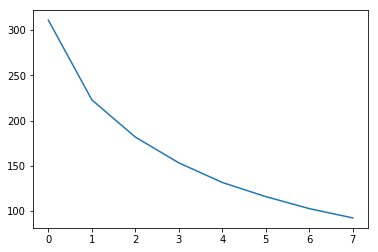

In [10]:
from sklearn.cluster import KMeans
loss = []
for i in range(2,10):
    K = KMeans(i, random_state=1)
    labels = K.fit(dim_scale)
    loss.append(labels.inertia_)

plt.plot(loss)

In [11]:
from sklearn.cluster import KMeans
K = KMeans(4, random_state=0)
K.fit(dim_scale)
labels

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [12]:
k_labels = K.predict(dim_scale)

In [13]:
k_labels

array([3, 1, 1, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 1, 0, 1, 3, 3, 2, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 2, 1, 1, 1, 2, 0, 2, 0, 0, 2, 3, 1, 1, 1, 2, 0,
       2, 2, 2, 2, 3, 1, 3, 2, 0, 0, 2, 0, 2, 1, 1, 2, 3, 1, 1, 2, 2, 0,
       1, 1, 2, 2, 1, 1, 3, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2,
       2, 2, 3, 2, 2, 2, 2, 1, 0, 0])

In [14]:
dim_scale['cluster'] = k_labels

In [15]:
dim_scale

,X,Y,Width,Height,cluster
0,0.038487,1.950464,-1.073729,-1.070015,3
1,0.053580,-0.544065,-0.557306,-0.547187,1
2,0.340348,-0.486720,-0.958969,-0.155066,1
3,0.506372,-0.142647,-0.442546,0.272702,2
4,-0.384118,1.204972,-1.073729,-0.725424,3
...,...,...,...,...,...
115,-0.580328,0.058062,-0.542961,0.748001,2
116,1.351582,-0.544065,-0.241715,0.629176,2
117,0.325255,-0.372029,-0.456891,-0.559070,1
118,-0.655793,-0.257338,1.307554,0.296467,0


In [16]:
from mpl_toolkits.mplot3d import Axes3D

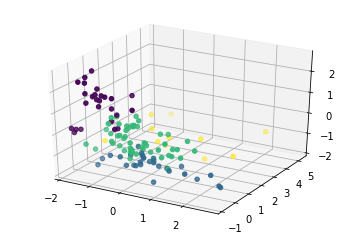

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = dim_scale['X']
y = dim_scale["Y"]
z = dim_scale['Width']
v = dim_scale['Height']

img = ax.scatter(x, y, z, c=dim_scale['cluster'])
plt.show()

In [24]:
# import seaborn as sns
# sns.scatterplot(x,y,hue=dim_scale['cluster'])

In [25]:
# dim

In [23]:
# x1 = x + width 
# y1 = y + height

In [28]:
centroids = K.cluster_centers_

# Top four Bounding Box centroids

In [29]:
centroids

array([[-1.03195808, -0.37313173,  1.44328058,  1.10447444],
       [ 0.64005301, -0.33823604, -0.94872212, -1.02672921],
       [ 0.12680955, -0.19255875, -0.00980247,  0.29954795],
       [ 0.17180919,  2.4641839 , -0.86931185, -1.34529224]])